# Sobre el dataset

### Descripción de las columnas:
**1. ID:** Un identificador para cada cliente.  
**2. Gender:** El género del cliente.  
**3. Own_car:** Una característica binaria que indica si el cliente posee un automóvil.  
**4. Own_property:** Una característica binaria que indica si el cliente posee una propiedad.  
**5. Work_phone:** Una característica binaria que indica si el cliente tiene un teléfono de trabajo.  
**6. Phone:** Una característica binaria que indica si el cliente tiene un teléfono.  
**7. Email:** Una característica binaria que indica si el cliente ha proporcionado una dirección de correo electrónico.  
**8. Unemployed:** Una característica binaria que indica si el cliente está desempleado. 
**9. Num_children:** El número de hijos que tiene el cliente.  
**10. Num_family:** El número total de miembros de la familia.  
**11. Account_length:** La duración de la cuenta del cliente con un banco o institución financiera.  
**12. Total_income:** El ingreso total del cliente.  
**13. Age:** La edad del cliente.  
**14. Years_employed:** El número de años que el cliente ha estado empleado.  
**15. Income_type:** El tipo de ingreso (por ejemplo, empleado, autónomo, etc.).  
**16. Education_type:** El nivel educativo del cliente.  
**17. Family_status:** El estado civil del cliente.  
**18. Housing_type:** El tipo de vivienda en la que vive el cliente.  
**19. Occupation_type:** El tipo de ocupación en la que está empleado el cliente.  
**20. Target:** La variable objetivo para la tarea de clasificación, que indica si el cliente es elegible para una tarjeta de crédito o no (por ejemplo, Sí/No, 1/0).  

# Indíce
**1- Importar librerias**  
**2- Cargar y examinar los datos**  
**3- Manejo de valores nulos y duplicados**  
**4- Manejo de valores outliers**  
Ingeniería de características  
**5- Guardar el dataset procesado**  

#### 1. Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from sys import path
import os
path.append(os.path.abspath(os.path.join('..')))
from util.util import *


In [2]:
os.chdir('..')

#### 2. Cargar y examinar los datos

In [4]:
#Dataset1
# df= pd.read_csv('data/raw/Dataset1.csv', sep=',')
# df= pd.read_csv('data/raw/Dataset2.csv', sep=',')
df= pd.read_parquet(os.getcwd()+'/data/processed/dataset_merged.parquet')


In [6]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,5008806,M,1,1,0,0,0,0,0,2,...,12555.0,1696,10859.0,0.519,1291,24,0.714,0.135,0.000098,0.999900
1,5008806,M,1,1,0,0,0,0,0,2,...,24407.0,2395,22012.0,1.071,2311,48,0.714,0.098,0.000065,0.999940
2,5008806,M,1,1,0,0,0,0,0,2,...,1438.3,537,901.3,0.819,715,13,0.182,0.373,0.997170,0.002825
3,5008806,M,1,1,0,0,0,0,0,2,...,10021.0,1617,8404.0,0.578,1275,25,0.667,0.161,0.000169,0.999830
4,5008806,M,1,1,0,0,0,0,0,2,...,12010.0,2149,9861.0,0.801,1700,35,1.500,0.179,0.000107,0.999890


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390030 entries, 0 to 390029
Data columns (total 42 columns):
 #   Column                                                                                                                              Non-Null Count   Dtype  
---  ------                                                                                                                              --------------   -----  
 0   ID                                                                                                                                  390030 non-null  int64  
 1   Gender                                                                                                                              390030 non-null  object 
 2   Own_car                                                                                                                             390030 non-null  int64  
 3   Own_property                                                              

In [8]:
df.describe()

,ID,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,3.900300e+05,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000,...,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000,390030.000000
mean,5.076199e+06,0.415696,0.692493,0.225149,0.301987,0.077330,0.119875,0.437089,2.435210,28.614860,...,7264.623396,1176.314204,6088.309192,0.772535,4214.105464,62.763872,0.716741,0.303444,0.156688,0.843312
std,4.056795e+04,0.492842,0.461462,0.417681,0.459120,0.267115,0.324816,0.751879,0.752227,16.708695,...,7999.632598,813.475708,7993.433492,0.238513,3342.492342,24.149552,0.249845,0.283677,0.362212,0.362212
min,5.008806e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1438.300000,0.000000,14.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,5.036876e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,...,2415.000000,499.000000,1097.000000,0.633000,1959.000000,42.000000,0.581000,0.029000,0.000098,0.999660
50%,5.078854e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,28.000000,...,3773.000000,1284.000000,2692.000000,0.743000,3796.000000,65.000000,0.706000,0.224000,0.000181,0.999820
75%,5.112975e+06,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,42.000000,...,8549.000000,1794.000000,7426.000000,0.872000,4717.000000,80.000000,0.824000,0.549000,0.000336,0.999900
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,9.000000,60.000000,...,34516.000000,2517.000000,34516.000000,2.675000,18484.000000,139.000000,3.571000,0.994000,0.999580,0.999990


#### 3. Manejo de valores nulos y duplicados

In [9]:
# buscar valores nulos
df.isnull().sum()*100/len(df)

ID                                                                                                                                    0.0
Gender                                                                                                                                0.0
Own_car                                                                                                                               0.0
Own_property                                                                                                                          0.0
Work_phone                                                                                                                            0.0
Phone                                                                                                                                 0.0
Email                                                                                                                                 0.0
Unemployed                        

In [10]:
# buscar valores duplicados
df.duplicated().sum()

0

Como podemos ver no existen nulos ni duplicados en el dataset. asi que no es necesario hacer algún tratamiento

#### 4. Manejo de valores outliers

In [11]:
get_outliers(df, implace=True)

Outliers in ID: 0
Outliers in Own_car: 0
Outliers in Own_property: 0
Outliers in Work_phone: 87815
Outliers in Phone: 68445
Outliers in Email: 19149
Outliers in Unemployed: 31443
Outliers in Num_children: 3938
Outliers in Num_family: 0
Outliers in Account_length: 0
Outliers in Total_income: 7481
Outliers in Age: 379
Outliers in Years_employed: 8126
Outliers in Target: 21282
Outliers in CLIENTNUM: 0
Outliers in Customer_Age: 0
Outliers in Dependent_count: 14619
Outliers in Months_on_book: 2330
Outliers in Total_Relationship_Count: 0
Outliers in Months_Inactive_12_mon: 4217
Outliers in Contacts_Count_12_mon: 7170
Outliers in Credit_Limit: 10993
Outliers in Total_Revolving_Bal: 0
Outliers in Avg_Open_To_Buy: 6460
Outliers in Total_Amt_Chng_Q4_Q1: 4845
Outliers in Total_Trans_Amt: 6308
Outliers in Total_Trans_Ct: 0
Outliers in Total_Ct_Chng_Q4_Q1: 2981
Outliers in Avg_Utilization_Ratio: 0
Outliers in Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
3,5008806,M,1,1,0,0,0,0,0,2,...,10021.0,1617,8404.0,0.578,1275,25,0.667,0.161,0.000169,0.99983
12,5008806,M,1,1,0,0,0,0,0,2,...,4188.0,1147,3041.0,1.042,1276,25,1.083,0.274,0.000298,0.99970
16,5008806,M,1,1,0,0,0,0,0,2,...,8184.0,1205,6979.0,0.965,2140,49,0.690,0.147,0.000181,0.99982
17,5008806,M,1,1,0,0,0,0,0,2,...,1654.0,1253,401.0,0.508,1887,60,0.538,0.758,0.000204,0.99980
18,5008806,M,1,1,0,0,0,0,0,2,...,12421.0,2517,9904.0,0.730,1913,49,0.690,0.203,0.000102,0.99990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389071,5148617,M,0,1,0,0,0,0,0,2,...,9106.0,975,8131.0,0.588,3863,74,0.644,0.107,0.000084,0.99992
389073,5148617,M,0,1,0,0,0,0,0,2,...,2540.0,1859,681.0,0.768,4480,80,0.702,0.732,0.000102,0.99990
389082,5148617,M,0,1,0,0,0,0,0,2,...,6383.0,1512,4871.0,0.558,4985,87,0.776,0.237,0.000097,0.99990
389383,5024877,M,1,1,0,0,0,0,0,2,...,2531.0,2360,171.0,0.955,1263,35,0.591,0.932,0.000307,0.99969


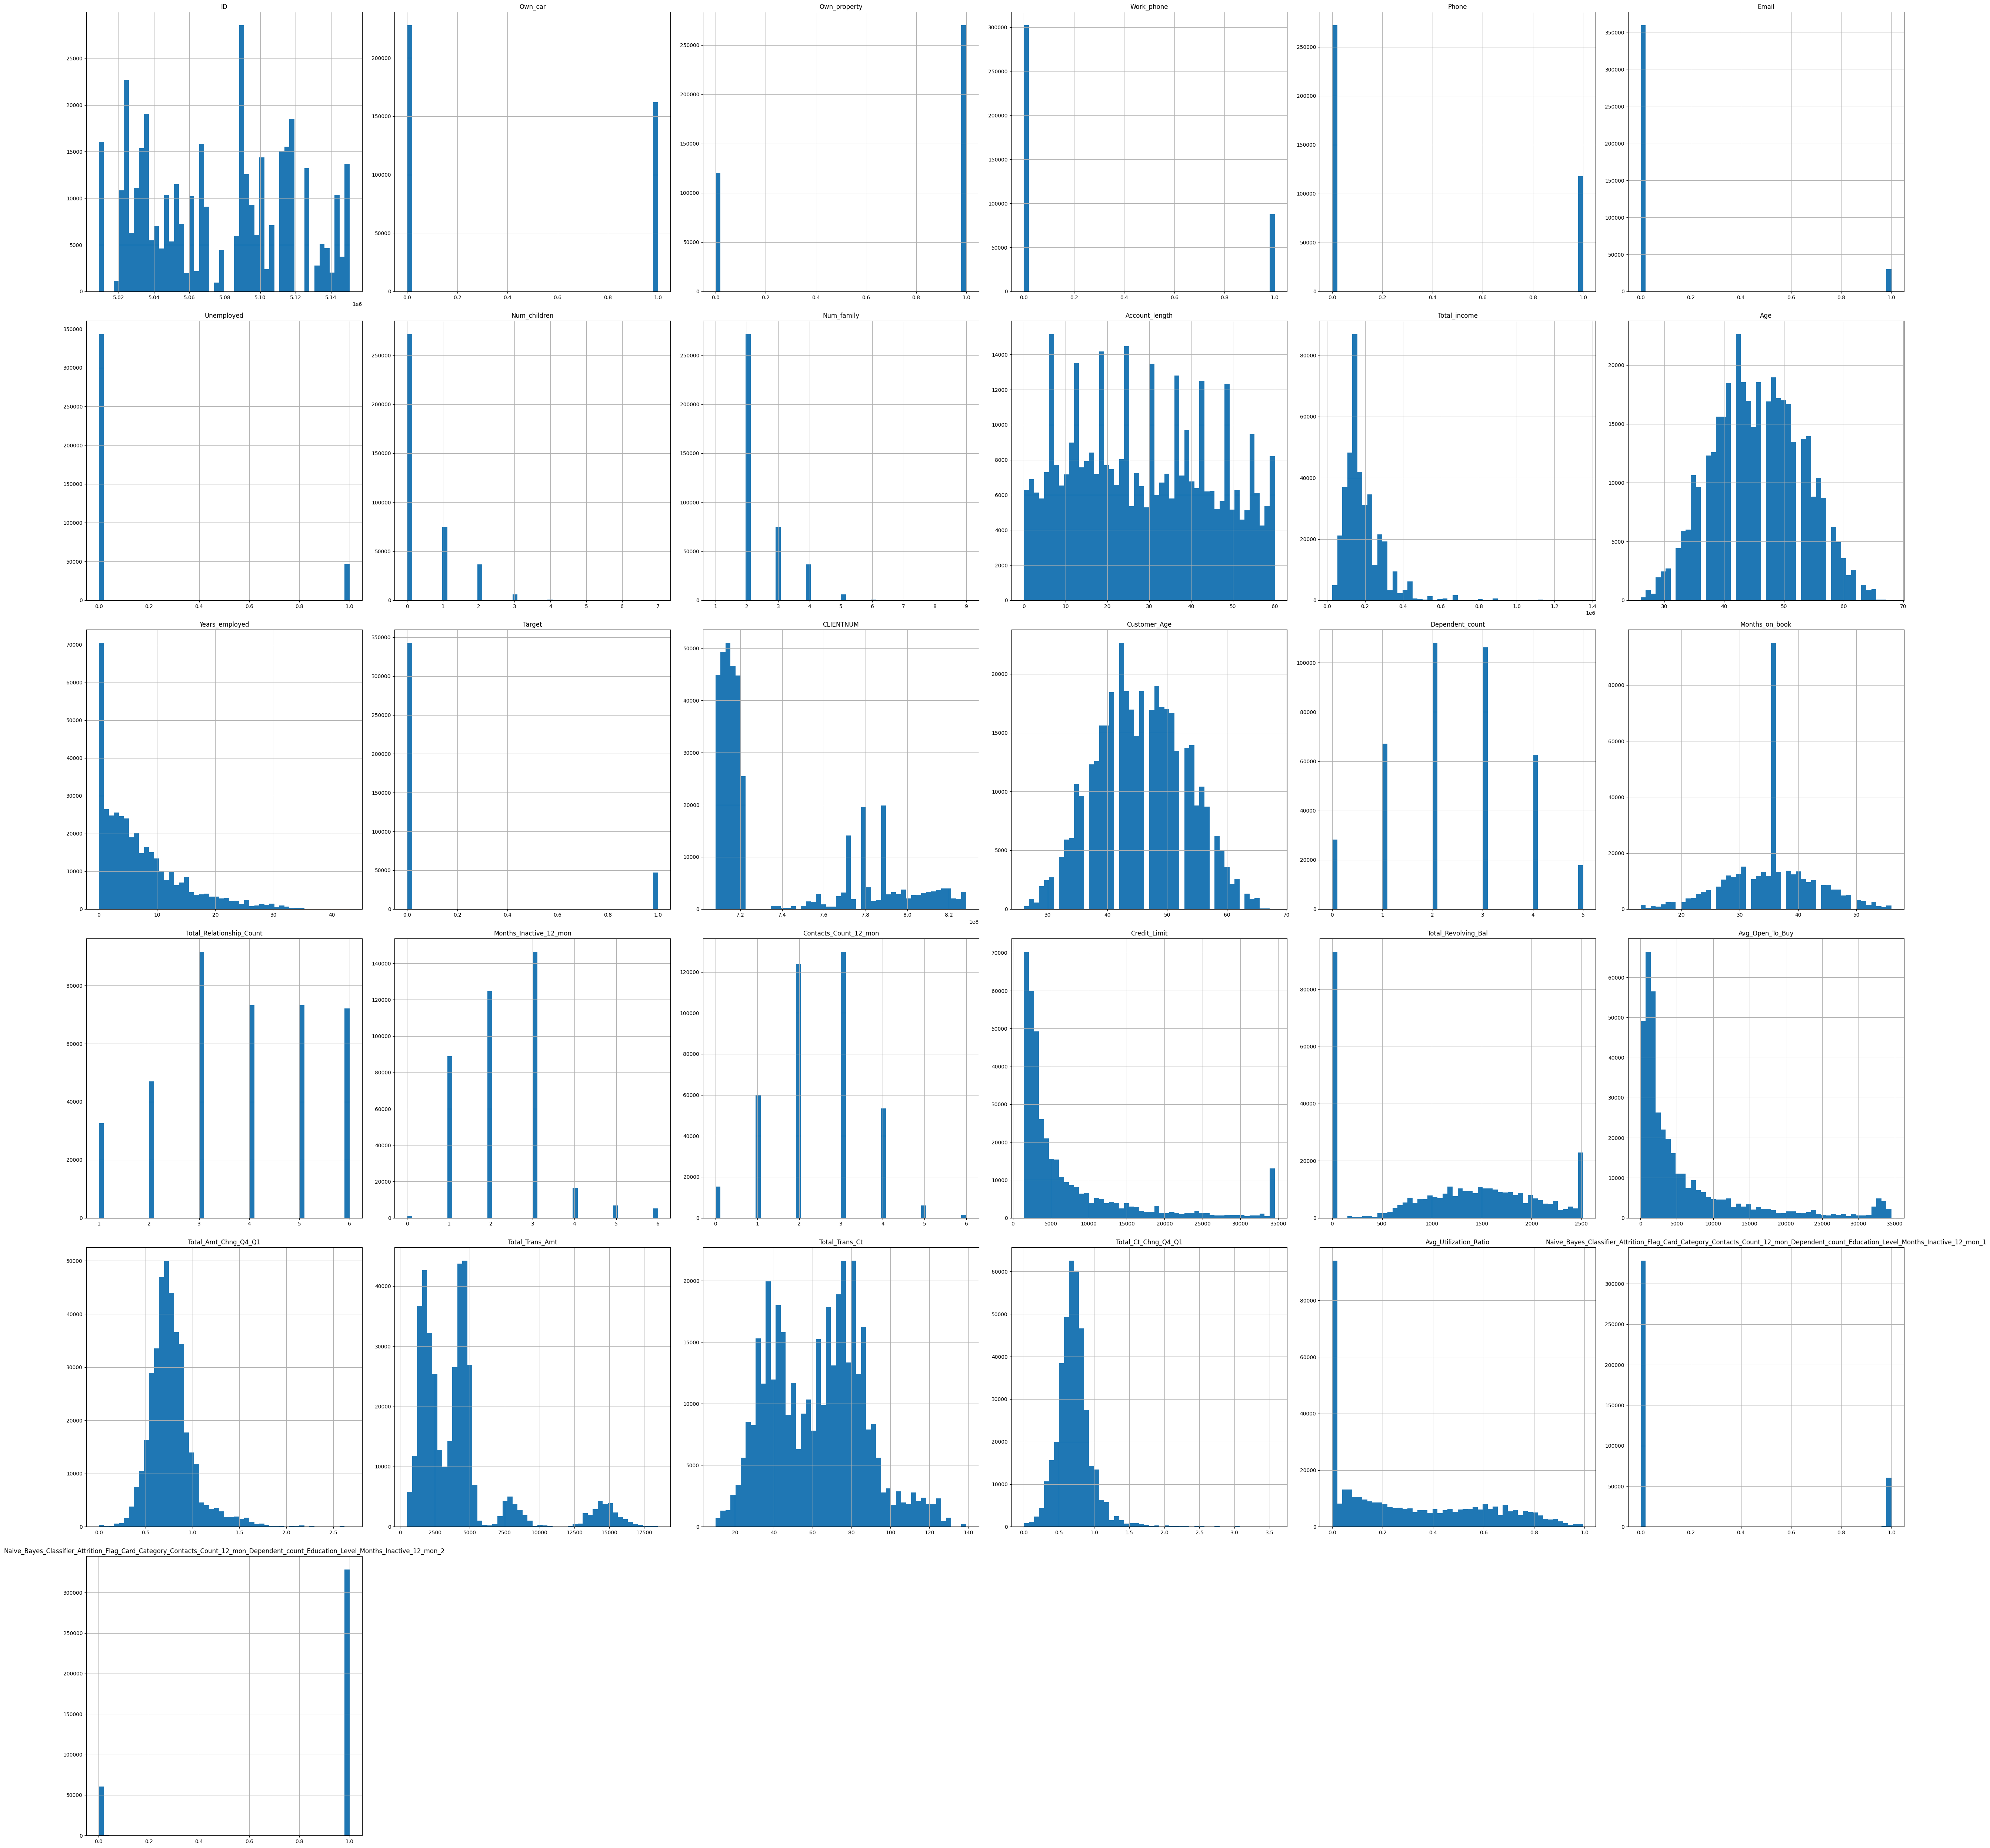

In [12]:
fig = df.hist(figsize=(10, 10), bins=50)
#ajustamos el layout
plt.tight_layout(rect=(0, 0, 5, 5))
plt.show()